In [1]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=2,
                  cluster_std=3,
                  random_state=23)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5,
                                                    random_state=23,
                                                    shuffle=True
                                                   )

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = torch.tensor(X_train, dtype=torch.float32,requires_grad=False)
X_test = torch.tensor(X_test, dtype=torch.float32,requires_grad=False)
y_train = torch.tensor(y_train, dtype=torch.long,requires_grad=False)
y_test = torch.tensor(y_test, dtype=torch.long,requires_grad=False)
# reshape the target tensor to match the predicted output tensor
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
torch.random.seed()


15851966948379887840

In [7]:
class perceptron(nn.Module):                    # class inherits from nn.Module, which is the base class for all neural network models in PyTorch
  def __init__(self,num_inputs):

    super(perceptron,self).__init__()        # Calls the constructor of the parent class (nn.Module), This is required so that PyTorch sets up everything internally,Without this line, your model wouldn’t behave like a proper nn.Module.
    self.linear = nn.Linear(num_inputs,1)       # Creates a fully connected linear layer.
  def heavside_step(self, Z):
    Class = []
    for z in Z:
      if z>=0:
        Class.append(1)
      else:
        Class.append(0)
    return torch.tensor(Class)
  def forward(self,x):

    Z = self.linear(x)
    return self.heavside_step(Z)






In [8]:
percep = perceptron(num_inputs=X_train.shape[1])
def loss(y_pred,Y):
  cost = y_pred - Y
  return cost

Streaming output truncated to the last 5000 lines.
Epoch [1/10], weight:[[-0.36598343  0.57690716]], bias:[0.33179003] Loss: 0.0000
Epoch [1/10], weight:[[-0.36619142  0.57542366]], bias:[0.33279002] Loss: -1.0000
Epoch [1/10], weight:[[-0.36543736  0.57414   ]], bias:[0.33179003] Loss: 0.0000
Epoch [1/10], weight:[[-0.36501625  0.5735136 ]], bias:[0.33079004] Loss: 1.0000
Epoch [1/10], weight:[[-0.36359203  0.5729266 ]], bias:[0.33179003] Loss: 0.0000
Epoch [1/10], weight:[[-0.3642654   0.57164234]], bias:[0.33079004] Loss: 1.0000
Epoch [1/10], weight:[[-0.36366186  0.5711683 ]], bias:[0.32979006] Loss: 2.0000
Epoch [1/10], weight:[[-0.36348468  0.5697855 ]], bias:[0.33079004] Loss: 1.0000
Epoch [1/10], weight:[[-0.36192805  0.5692377 ]], bias:[0.32979006] Loss: 2.0000
Epoch [1/10], weight:[[-0.36007556  0.5679941 ]], bias:[0.33079004] Loss: 1.0000
Epoch [1/10], weight:[[-0.35868624  0.5669734 ]], bias:[0.33179003] Loss: 0.0000
Epoch [1/10], weight:[[-0.3579847   0.56546015]], bias:[0

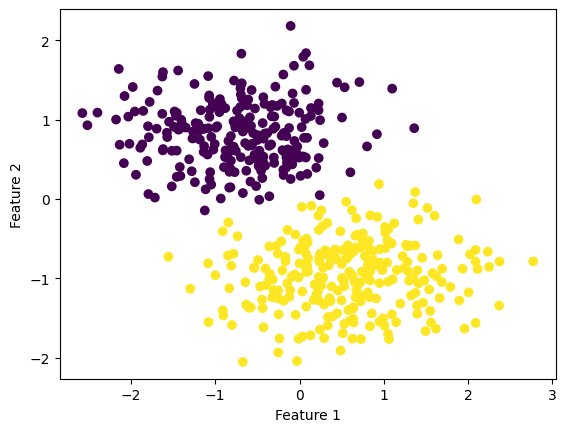

In [9]:
learning_rate = 0.001
num_epochs = 10
for ep in range(num_epochs):
  Losses = 0
  for input, Class in zip(X_train,y_train):
    predicted_class = percep(input)
    error = loss(predicted_class,Class)
    Losses +=error
    w = percep.linear.weight
    b = percep.linear.bias
    w = w - learning_rate * error * input
    b = b - learning_rate * error
    percep.linear.weight = nn.Parameter(w)
    percep.linear.bias = nn.Parameter(b)
    print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
        ep+1,num_epochs,
        w.detach().numpy(),
        b.detach().numpy(),
        Losses.item()))
    pred = percep(X_test)

accuracy = (pred==y_test[:,0]).float().mean()
print("Accuracy on Test Dataset:", accuracy.item())

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


